In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

"""
## Prepare the data
"""

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
"""
## Build the model
"""

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(2, 2), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2304)             

In [12]:
"""
## Train the model
"""

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 30ms/step - loss: 0.3933 - accuracy: 0.8817 - val_loss: 0.0852 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 13s 31ms/step - loss: 0.1211 - accuracy: 0.9623 - val_loss: 0.0622 - val_accuracy: 0.9823
Epoch 3/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0918 - accuracy: 0.9714 - val_loss: 0.0522 - val_accuracy: 0.9848
Epoch 4/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0782 - accuracy: 0.9752 - val_loss: 0.0485 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0693 - accuracy: 0.9785 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 6/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0619 - accuracy: 0.9801 - val_loss: 0.0407 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0445 - val_accuracy:

In [13]:
"""
## Evaluate the trained model
"""

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03085188940167427
Test accuracy: 0.989799976348877


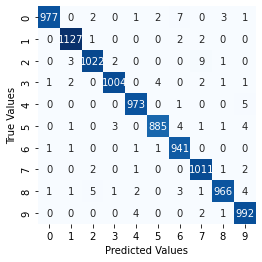

In [17]:
y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

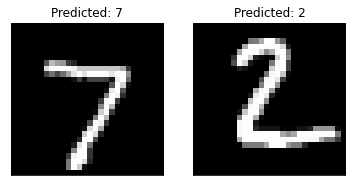

In [30]:
plt.subplot(121),plt.imshow(x_test[0], cmap = 'gray')
plt.title('Predicted: '+str(Y_pred[0])), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(x_test[1], cmap = 'gray')
plt.title('Predicted: '+str(Y_pred[1])), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
x_train.shape

(60000, 28, 28, 1)